In [22]:
import pandas as pd 
import requests
import numpy as np 

np.random.seed(123143)

url = 'https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv'

r = requests.get(url)
with open('dados/exames.csv', 'wb') as f:
    f.write(r.content)


In [23]:
resultados_exames = pd.read_csv(url)
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [24]:
# porenctagem de elementos faltantes em cada coluna


resultados_exames.isnull().sum() / 569 *100

id              0.000000
diagnostico     0.000000
exame_1         0.000000
exame_2         0.000000
exame_3         0.000000
exame_4         0.000000
exame_5         0.000000
exame_6         0.000000
exame_7         0.000000
exame_8         0.000000
exame_9         0.000000
exame_10        0.000000
exame_11        0.000000
exame_12        0.000000
exame_13        0.000000
exame_14        0.000000
exame_15        0.000000
exame_16        0.000000
exame_17        0.000000
exame_18        0.000000
exame_19        0.000000
exame_20        0.000000
exame_21        0.000000
exame_22        0.000000
exame_23        0.000000
exame_24        0.000000
exame_25        0.000000
exame_26        0.000000
exame_27        0.000000
exame_28        0.000000
exame_29        0.000000
exame_30        0.000000
exame_31        0.000000
exame_32        0.000000
exame_33       73.637961
dtype: float64

In [25]:
# Devido ao alto número de celulas vazias na coluna 'exame_33' irei deleta-la

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

resultados_exames = resultados_exames.drop('exame_33', axis = 1)

X = resultados_exames.drop(['id', 'diagnostico'], axis = 1)
Y = resultados_exames['diagnostico']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)



classificador = RandomForestClassifier()
classificador.fit(x_train, y_train)

acuracia = classificador.score(x_test, y_test)
print(f'A acurácia do modelo RandomForeste foi de {acuracia*100: 0.2f}%')

A acurácia do modelo RandomForeste foi de  92.40%


In [26]:
# Comparação o modelo com o dummyclassifier

from sklearn.dummy import DummyClassifier

modelo_dummy = DummyClassifier(strategy='most_frequent')
modelo_dummy.fit(x_train, y_train)

acuracia = modelo_dummy.score(x_test, y_test)
print(f'A acurácia do modelo Dummy foi de {acuracia*100: 0.2f}%')

A acurácia do modelo Dummy foi de  66.67%


### O modelo inicial, RandomForest, teve um bom desempenho comparado como dummy. Irei adota-lo como baseline

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


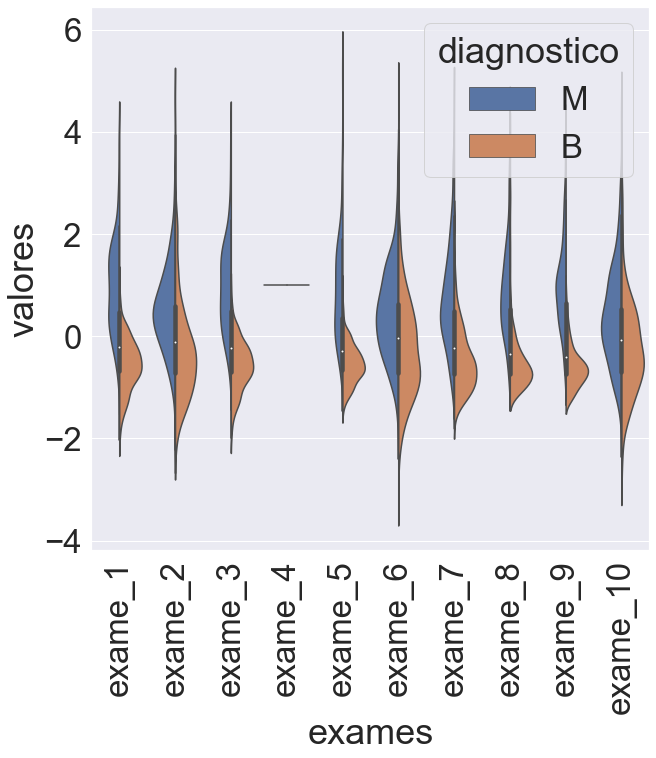

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
X_v2 = padronizador.fit_transform(X)
X_v2 = pd.DataFrame(data = X_v2, columns=X.columns)


dados_plot = pd.concat([Y,X_v2.iloc[:,0:10]], axis = 1)


dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')
dados_plot.head()

ax = sns.violinplot(data = dados_plot, x = 'exames', y = 'valores', hue = 'diagnostico', split=True)
ax.figure.set_size_inches(10,10)
plt.xticks(rotation = 90)
ax;

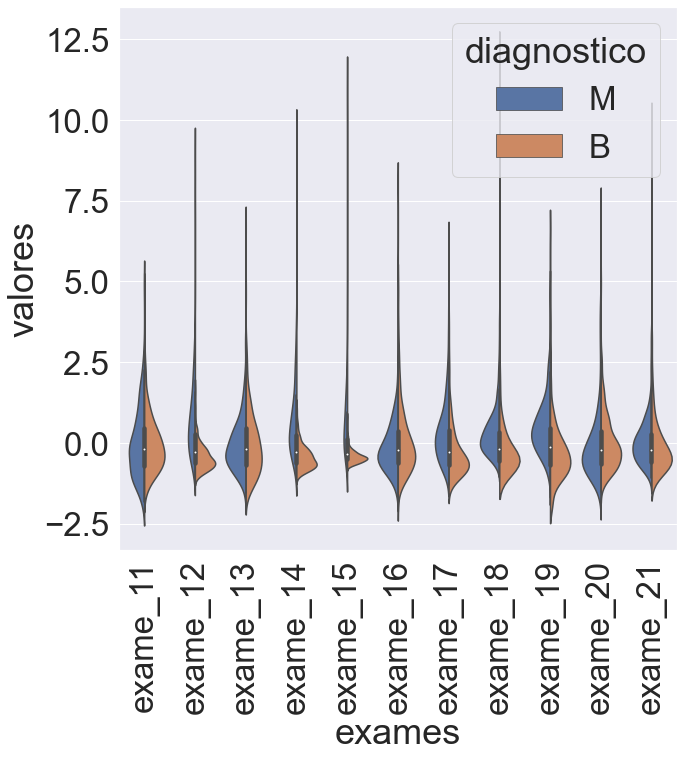

In [28]:
def grafico_violin(valores, inicio, fim):
    dados_plot = pd.concat([Y,valores.iloc[:,inicio:fim]], axis = 1)


    dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')
    dados_plot.head()

    ax = sns.violinplot(data = dados_plot, x = 'exames', y = 'valores', hue = 'diagnostico', split=True)
    ax.figure.set_size_inches(10,10)
    plt.xticks(rotation = 90)
    ax;
grafico_violin(X_v2, 10, 21)

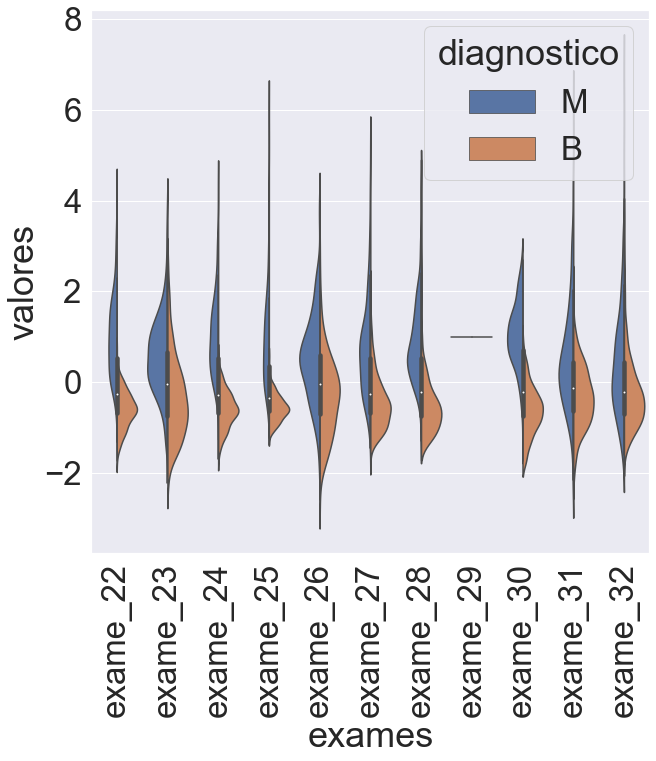

In [29]:
grafico_violin(X_v2, 21, 32)

In [30]:
X_v3 = X_v2.drop(['exame_29', 'exame_4'], axis = 1)

def classificar(valores, titulo):
    SEED = 1234
    np.random.seed(SEED)
    x_train, x_test, y_train, y_test = train_test_split(valores, Y, test_size = 0.3)

    classificador = RandomForestClassifier()
    classificador.fit(x_train, y_train)

    acuracia = classificador.score(x_test, y_test)
    print(f'Caracteristica do molode: {titulo}')
    print(f'A acurácia do modelo RandomForest foi de {acuracia*100: 0.2f}%')
classificar(X_v3, 'sem exame_29 e exame_4')

Caracteristica do molode: sem exame_29 e exame_4
A acurácia do modelo RandomForest foi de  92.98%


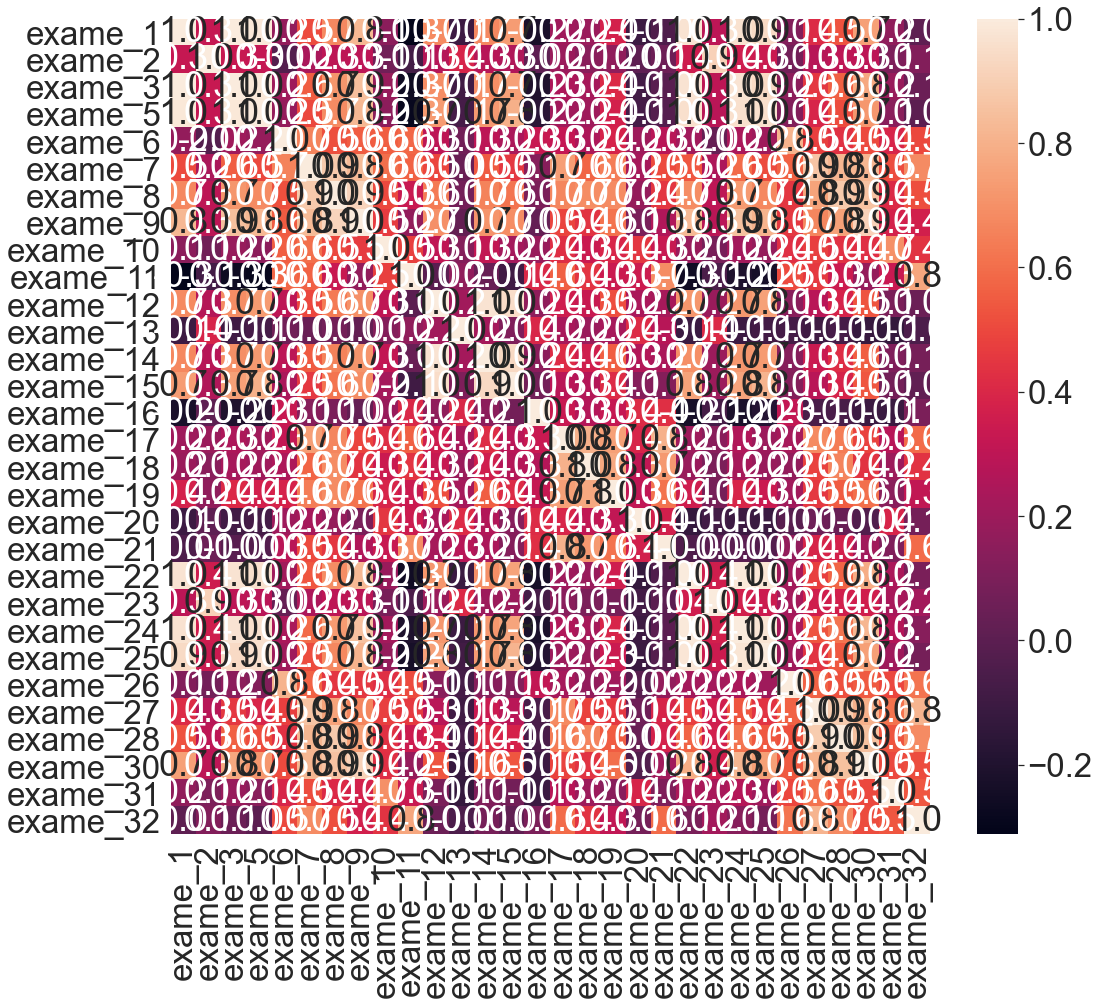

In [31]:
matriz_correlacao = X_v3.corr()

ax = sns.heatmap(matriz_correlacao, annot=True, fmt='.1f', xticklabels=True, yticklabels=True)
ax.figure.set_size_inches(17,15)

In [32]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [33]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

** As variavies exame_1 e exame_3 estao altamente correlacionadas assim como exame_22 e exame_24 **
** Portanto, removerei uma das mantendo a primeira **

In [34]:
X_v4 = X_v3.drop(['exame_3', 'exame_24'], axis = 1)
classificar(X_v4, 'remoção das colunas exame_3 e exame_24. Devido a correlação alta existente com outras variáveis')

Caracteristica do molode: remoção das colunas exame_3 e exame_24. Devido a correlação alta existente com outras variáveis
A acurácia do modelo RandomForest foi de  92.98%


In [35]:
from sklearn.feature_selection import SelectKBest, chi2

SEED = 1234
np.random.seed(SEED)


selecionar_kmelhores = SelectKBest(chi2, k = 5)

exames_nao_normalizados = X.drop(['exame_4', 'exame_24', 'exame_29', 'exame_3'], axis = 1)
    
x_train, x_test, y_train, y_test = train_test_split(exames_nao_normalizados, Y, test_size = 0.3)


selecionar_kmelhores.fit(x_train, y_train)
x_train_kbest = selecionar_kmelhores.transform(x_train)
x_test_kbest = selecionar_kmelhores.transform(x_test)

classificador = RandomForestClassifier()
classificador.fit(x_train_kbest, y_train)


acuracia = classificador.score(x_test_kbest, y_test)
print(f'A acurácia do modelo RandomForest com 5 features foi de {acuracia*100: 0.2f}%')

A acurácia do modelo RandomForest com 5 features foi de  92.98%


In [36]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_test, classificador.predict(x_test_kbest))
matriz_confusao

array([[101,   4],
       [  8,  58]], dtype=int64)

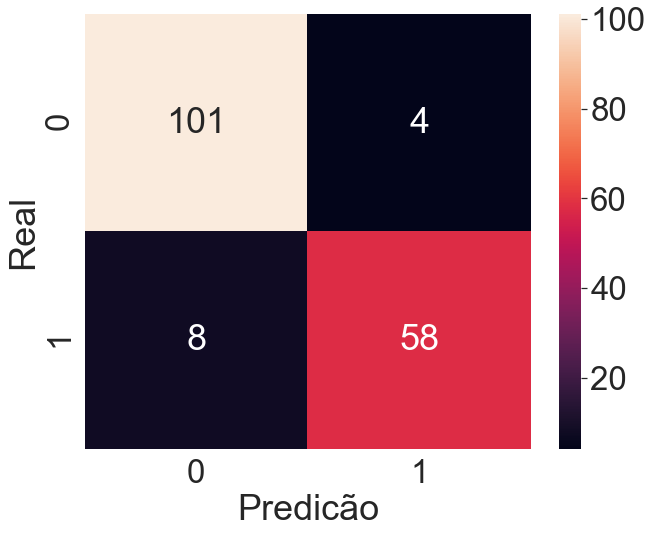

In [37]:
ax = sns.heatmap(matriz_confusao, annot=True, fmt='d', xticklabels=True, yticklabels=True)
ax.set_xlabel('Predicão')
ax.set_ylabel('Real')
ax.figure.set_size_inches(10,8)
sns.set(font_scale = 3)

A acurácia do modelo RandomForest com 5 features selecionadas pelo RFE foi de  90.06%


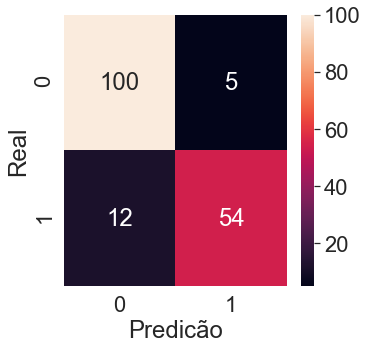

In [42]:
from sklearn.feature_selection import RFE

SEED = 1234
np.random.seed(SEED)

#Split dos dados para treino e teste
x_train, x_test, y_train, y_test = train_test_split(exames_nao_normalizados, Y, test_size = 0.3)

# Criação do estimador para selecionar as melhores features
classificador = RandomForestClassifier()
classificador.fit(x_train, y_train)

# Seleção das melhores features com o RFE
selecionar_rfe = RFE(estimator= classificador, n_features_to_select=5, step=1)
selecionar_rfe.fit(x_train, y_train)
x_train_rfe = selecionar_rfe.transform(x_train)
x_test_rfe = selecionar_rfe.transform(x_test)

# Treinamento do modelo com as melhores features
classificador.fit(x_train_rfe, y_train)

# Criação da matriz de confusão
matriz_confusao = confusion_matrix(y_test, classificador.predict(x_test_rfe))
matriz_confusao

# Gráfico da matriz de confusão
sns.set(font_scale = 2)
ax = sns.heatmap(matriz_confusao, annot=True, fmt='d', xticklabels=True, yticklabels=True)
ax.set_xlabel('Predicão')
ax.set_ylabel('Real')
ax.figure.set_size_inches(5,5)



# Acurácia do modelo
acuracia = classificador.score(x_test_rfe, y_test)
print(f'A acurácia do modelo RandomForest com 5 features selecionadas pelo RFE foi de {acuracia*100: 0.2f}%')

A acurácia do modelo RandomForest com 5 features selecionadas pelo RFECV foi de  92.98%


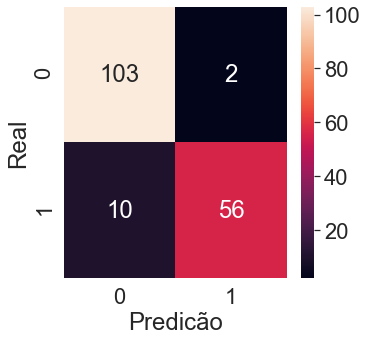

In [45]:
from sklearn.feature_selection import RFECV

SEED = 1234
np.random.seed(SEED)

#Split dos dados para treino e teste
x_train, x_test, y_train, y_test = train_test_split(exames_nao_normalizados, Y, test_size = 0.3)

# Criação do estimador para selecionar as melhores features
classificador = RandomForestClassifier()
classificador.fit(x_train, y_train)

# Seleção das melhores features com o RFE
selecionar_rfecv = RFECV(estimator= classificador, cv = 5, step=1, scoring='accuracy')
selecionar_rfecv.fit(x_train, y_train)
x_train_rfecv = selecionar_rfecv.transform(x_train)
x_test_rfecv = selecionar_rfecv.transform(x_test)

# Treinamento do modelo com as melhores features
classificador.fit(x_train_rfecv, y_train)

# Criação da matriz de confusão
matriz_confusao = confusion_matrix(y_test, classificador.predict(x_test_rfecv))
matriz_confusao

# Gráfico da matriz de confusão
sns.set(font_scale = 2)
ax = sns.heatmap(matriz_confusao, annot=True, fmt='d', xticklabels=True, yticklabels=True)
ax.set_xlabel('Predicão')
ax.set_ylabel('Real')
ax.figure.set_size_inches(5,5)



# Acurácia do modelo
acuracia = classificador.score(x_test_rfecv, y_test)
print(f'A acurácia do modelo RandomForest com 5 features selecionadas pelo RFECV foi de {acuracia*100: 0.2f}%')

In [50]:
x_train.columns[selecionar_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_12', 'exame_14', 'exame_15', 'exame_18', 'exame_21',
       'exame_22', 'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28',
       'exame_30', 'exame_31', 'exame_32'],
      dtype='object')

In [52]:
len(selecionar_rfecv.grid_scores_)

28

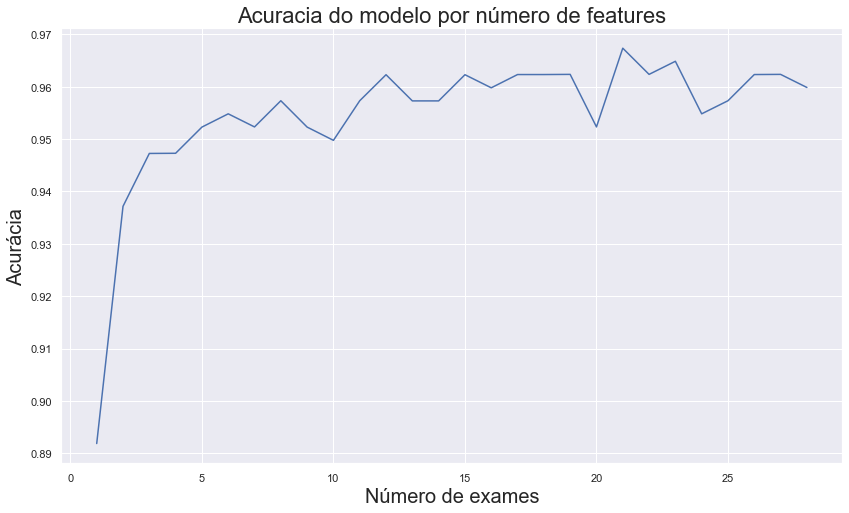

In [65]:
plt.figure(figsize=(14,8))
plt.title('Acuracia do modelo por número de features', fontsize = 22)
plt.xlabel('Número de exames', fontsize=20)
plt.ylabel('Acurácia', fontsize = 20)
plt.grid(True)
plt.plot(range(1, len(selecionar_rfecv.grid_scores_)+1), selecionar_rfecv.grid_scores_)
plt.show()


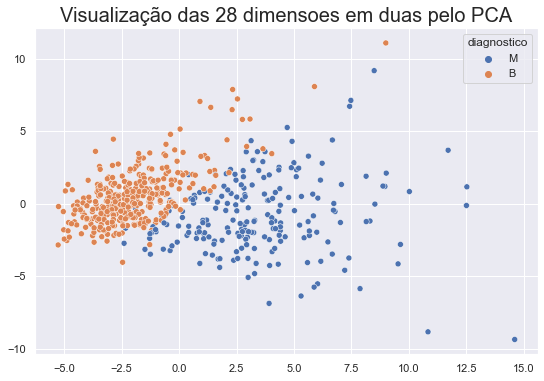

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
exames_decompostos = pca.fit_transform(X_v4)

ax = sns.scatterplot(x = exames_decompostos[:,0], y = exames_decompostos[:,1], hue = Y)
ax.figure.set_size_inches(9,6)
ax.set_title('Visualização das 28 dimensoes em duas pelo PCA', fontsize = 20)
ax;

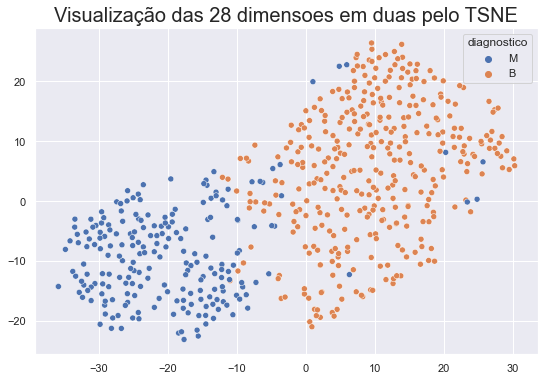

In [82]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
exames_decompostos_tsne = tsne.fit_transform(X_v4)

ax = sns.scatterplot(x = exames_decompostos_tsne[:,0], y = exames_decompostos_tsne[:,1], hue = Y)
ax.figure.set_size_inches(9,6)
ax.set_title('Visualização das 28 dimensoes em duas pelo TSNE', fontsize = 20)
ax;